# Mortalidade infantil, PNB e Alfabetização Feminina

### Apresentação

Esse exercício replica um exemplo ilustrativo apresentado em Gujarati (Exemplo 7.1 - Econometria Básica, 5 ed. pag 214).

Trata-se de um modelo de regressão múltipla que busca explicar a ***mortalidade infantil*** a partir do ***PNB per capita*** e da ***taxa de alfabetização feminina***.

Para isso, utiliza-se aqui as bilbliotecas `pandas`, `statsmodels`, `seaborn`, e `matplotlib`.

In [1]:
import pandas as pd
# import statsmodels.api as sm # Não precisa! Só se você for utilizar a fórmula
from statsmodels.formula.api import ols

---
### Dados

Os dados constam no arquivo `Fecundidade e outras informações.xlsx`, disponíveis no diretório.

As variáveis disponíveis abrangem um total de 64 países para o ano de 1980.

- $MI$ = Mortalidade infantil: número anual de óbitos de crianças menores de 5 anos por 1.000 nascidos vivos.
- $TAF$ = Taxa de alfabetização feminina (em %)
- $PNBpc$ = PNBpc em 1980.
- $TFT$ = Taxa de fecundidade total, 1980-1985: número médio de filhos por mulher, com base nas taxas de fecundidade segundo a idade, em determinado ano.

Neste exercício, utiliza-se apenas as variáveis $MI$, $TAF$ e $PNBpc$.

In [2]:
# Dados
fec = pd.read_excel('Fecundidade e outras informações.xlsx')
fec.head()

,Observação,MI,TAF,PNBpc,TFT
0,1,128,37,1870,6.66
1,2,204,22,130,6.15
2,3,202,16,310,7.00
3,4,197,65,570,6.25
4,5,96,76,2050,3.81


---
### Visualização e primeiras impressões

#### PNBpc e Mortalidade
Primeiro, consideremos apenas as variáveis $MI$, $PNBpc$ e $TAF$ para a visualização.

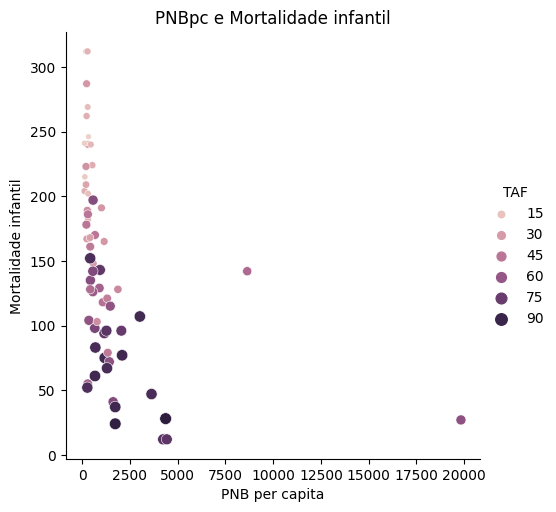

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.relplot(x='PNBpc',
            y='MI',
            data=fec,
            hue='TAF',size='TAF')
plt.title('PNBpc e Mortalidade infantil')
plt.ylabel('Mortalidade infantil')
plt.xlabel('PNB per capita')
plt.show()

Como seria de se esperar, maiores taxas de mortalidade infantil estão relacionadas com menores níveis de PNB per capita.
<br>É possível verificar também que maiores taxas de alfabetização feminina estão associadas menores níveis de mortalidade infantil.

Portanto, a partir dos dados, pode-se assumir: <font color='lightblue'>**maiores níveis de PNBpc e alfab.feminina**</font> se associam a <font color='lightblue'>**menores níveis de mortalidade infantil**</font>.

#### Fecundidade e Mortalidade
Agora, considera-se as variáveis $MI$, $TFT$ e $TAF$ para a visualização.

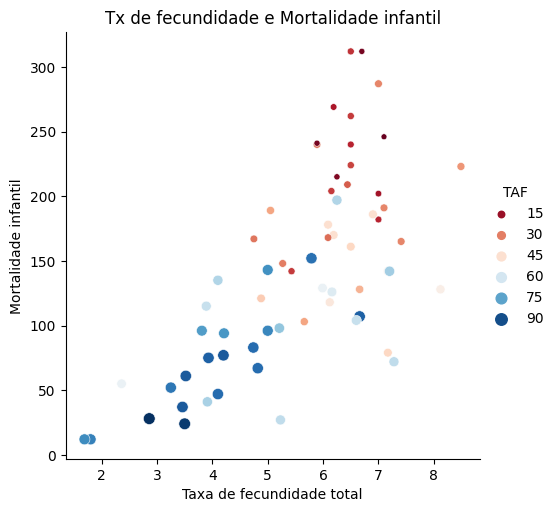

            Observação        MI       TAF     PNBpc       TFT
Observação    1.000000 -0.095375  0.121808  0.041914 -0.050242
MI           -0.095375  1.000000 -0.818285 -0.407697  0.671135
TAF           0.121808 -0.818285  1.000000  0.268530 -0.625954
PNBpc         0.041914 -0.407697  0.268530  1.000000 -0.185718
TFT          -0.050242  0.671135 -0.625954 -0.185718  1.000000


In [48]:
sns.relplot(x='TFT',
            y='MI',
            data=fec,
            hue='TAF',size='TAF',
            palette='RdBu')
plt.title('Tx de fecundidade e Mortalidade infantil')
plt.ylabel('Mortalidade infantil')
plt.xlabel('Taxa de fecundidade total')
plt.show()

print(fec.corr())

Aqui é possível verificar que mortalidade infantil e taxa de fecundidade total estão positivamente correlacionadas. Além disso, existe correlação negativa entre alfabetização feminina e taxa de fecundidade total.

Isso quer dizer que, em países onde a alfabetização feminina é baixa, as mulheres têm mais filhos.
<br>E que, na média, países com muitos filhos por mulher têm taxas de mortalidade infantil mais altas.

<font color='red'>***NOTA***</font> <br>*Essa não é uma análise da relação de causa/efeito, trata-se apenas da observação de correlação entre as variáveis. <br>Para relações de causa/efeito, outros métodos são utilizados. Além disso, a discussão sobre os fenômenos socioeconômicos frequentemente considera vários abordagens complementares à análise econométrica.*

---
### Modelo

Como dito na apresentação, utiliza-se um modelo de regressão múltipla que busca relacionar *mortalidade infantil*, *PNBpc* e *tx de alfabetização feminina*.

O modelo:

$$
MI_i = \beta_1 + \beta_2 PNBpc_i + \beta_3 TAF_i + u_i
$$

In [15]:
# Modelo
model_fit = ols(formula='MI ~ PNBpc + TAF',
                data=fec).fit()
print(model_fit.summary())
# print(model_fit.params)

                            OLS Regression Results                            
Dep. Variable:                     MI   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     73.83
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           5.12e-17
Time:                        14:01:05   Log-Likelihood:                -328.10
No. Observations:                  64   AIC:                             662.2
Df Residuals:                      61   BIC:                             668.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    263.6416     11.593     22.741      0.0

---
### Resultados e Análises

Modelo estimado:

$$
\hat{MI_i} = 263.6416 -0.0056 PNBpc_i -2.2316 TAF_i
$$
 

- $\beta_2 = -0.0056$: <br><br>Significa dizer que quando $PNBpc$ aumenta em um dólar, a mortalidade reduz-se em 0,0056.

- $\beta_3 = -2.2316$: <br><br>Se a taxa de alfabetização feminia aumenta em 1 ponto percentual, o número de óbitos reduz em 2,23 por mil nascidos vivos.

- $\beta_1 = 263.6416$: <br><br>Se $PNBpc$ e $TAF$ são zero, a mortalidade média é 263,64. <br>É necessário ter bastante <font color='red'>**cautela**</font> nessa interpretação. <br>A leitura mais indicada para este intercepto é "*se $PNBpc$ e $TAF$ são zero, a mortalidade infantil é muito alta*".

- $R^2 = 0.708$: <br>Indica que 70,8% da variação de $MI$ pode ser explicado por $PNBpc$ e $TAF$. 

---
### Considerações finais
De modo geral, pode-se afirmar maiores níveis de PNB per capita, bem como taxa de alfabetização feminina, exercem efeito negativo sobre as taxas de mortalidade infantil. 

O modelo estimado auxilia na quantificação desses efeitos. Cada ponto percentual a mais na alfabetização feminina reduz a mortalidade em 2,23; a cada $178 de acréscimo no PNB per capita, a mortalidade em 1 (0,0056 para cada dólar). 